# Analyse de données des passagers du Titanic (kaggle.com)

In [1]:
install.packages("dplyr")

also installing the dependencies 'glue', 'cli', 'rlang', 'vctrs'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
glue   1.4.2  1.6.2              TRUE
cli    2.5.0  3.3.0              TRUE
rlang 0.4.11  1.0.3              TRUE
vctrs  0.3.8  0.4.1              TRUE
dplyr  1.0.6  1.0.9              TRUE

  Binaries will be installed
package 'glue' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Alexandre\AppData\Local\Temp\RtmpyGs8Ob\downloaded_packages


In [2]:
install.packages("ggplot2")


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.6             FALSE



installing the source package 'ggplot2'



In [3]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'



In [4]:
library("dplyr")

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
library("ggplot2")

In [6]:
library("corrplot")

corrplot 0.92 loaded


In [7]:
titanic <- read.csv("train.csv")

In [13]:
# Explorer la structure des données :

lapply(titanic, class)


$PassengerId
[1] "integer"

$Survived
[1] "integer"

$Pclass
[1] "integer"

$Name
[1] "factor"

$Sex
[1] "factor"

$Age
[1] "numeric"

$SibSp
[1] "integer"

$Parch
[1] "integer"

$Ticket
[1] "factor"

$Fare
[1] "numeric"

$Cabin
[1] "factor"

$Embarked
[1] "factor"

In [15]:
#Valeurs manquantes
missing <- which(is.na(titanic),arr.ind=TRUE)
dim(missing)
# Il manque l'age de 177 passagers

[1] 177   2

In [16]:
#Selection des variables que nous allons étudier
data <- select(titanic, Survived, Sex, Pclass, Age)
summary(data)

    Survived          Sex          Pclass           Age       
 Min.   :0.0000   female:314   Min.   :1.000   Min.   : 0.42  
 1st Qu.:0.0000   male  :577   1st Qu.:2.000   1st Qu.:20.12  
 Median :0.0000                Median :3.000   Median :28.00  
 Mean   :0.3838                Mean   :2.309   Mean   :29.70  
 3rd Qu.:1.0000                3rd Qu.:3.000   3rd Qu.:38.00  
 Max.   :1.0000                Max.   :3.000   Max.   :80.00  
                                               NA's   :177    

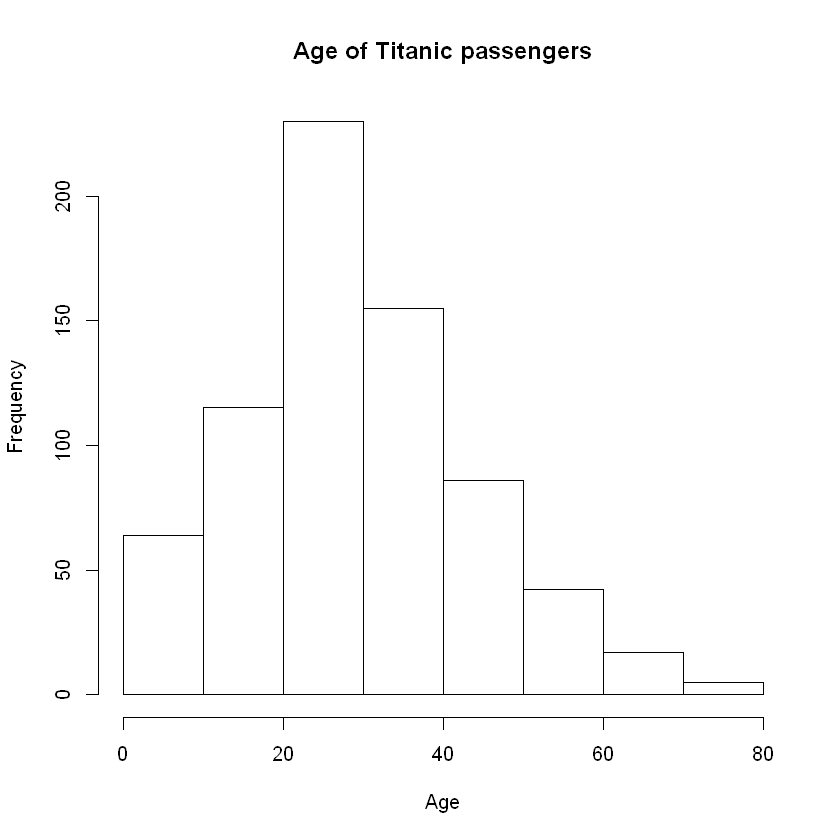

In [17]:
# Histogramme montrant la distribution de l'age des passagers
hist(data$Age, main="Age of Titanic passengers", xlab="Age")


In [18]:
# Voyons la distribution des passagers selon leur classe
data %>% group_by(Pclass) %>% summarise(sum(Pclass))
# 216 passagers en 1e classe, 368 en 2nd et 1473 en 3e classe

Pclass,sum(Pclass)
1,216
2,368
3,1473


In [19]:
# Regardons le nombre de femmes et d'hommes
summarise(data, 'female_count' = sum(Sex=='female'),
          'male_count' = sum(Sex=='male'))
# 314 femmes and 577 hommes

female_count,male_count
314,577


In [20]:
# On transforme nos 3 variables en facteurs pour ggplot
data$Sex<-as.factor(data$Sex)
data$Pclass<-as.factor(data$Pclass)
data$Survived<-as.factor(data$Survived)

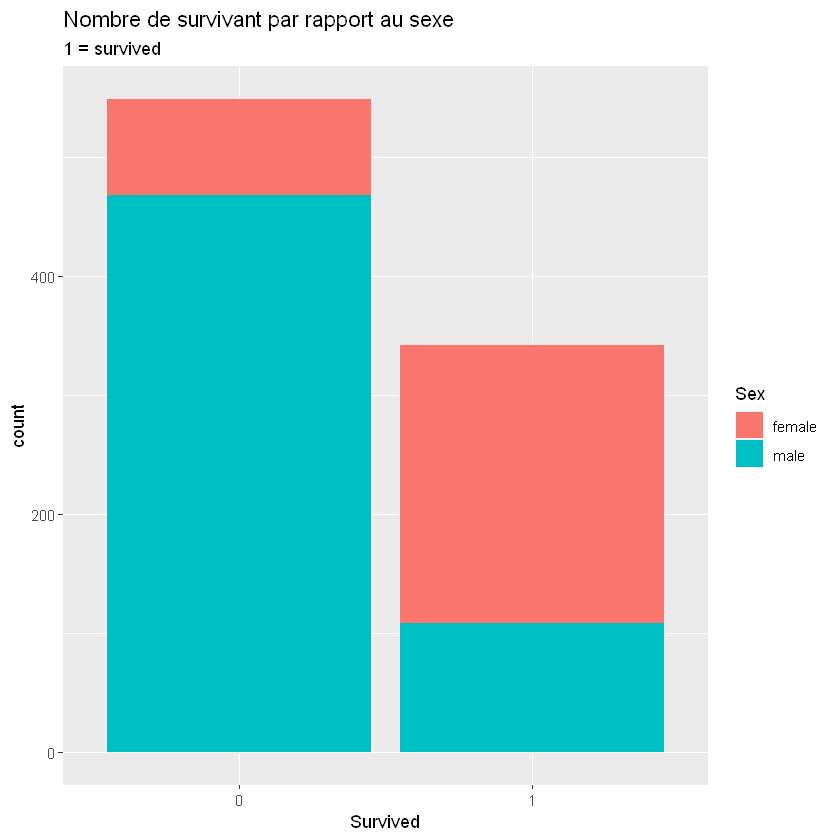

In [21]:
# Graphique représentant le nombre de passager qui a survecu (ou non) par rapport au sexe
ggplot(data) + 
  geom_bar(aes(x=Survived, fill=Sex)) + 
  labs(title = "Nombre de survivant par rapport au sexe",
       subtitle = "1 = survived")

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

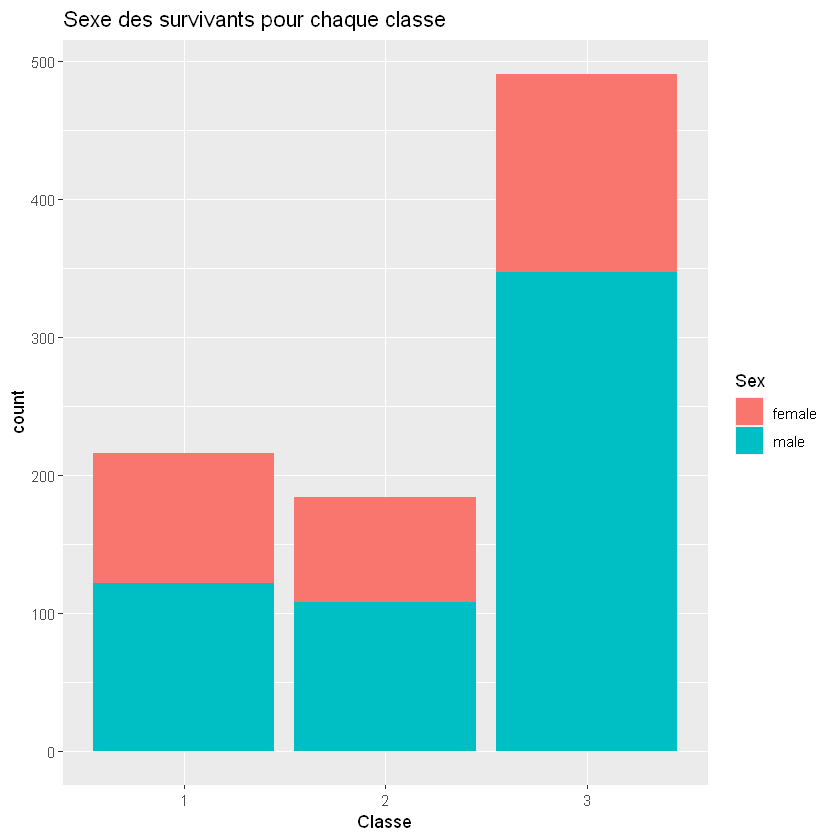

In [25]:
# Graphique : Sexe des passagers  par rapport à leur classe
ggplot(data) + 
  geom_histogram(aes(x=Pclass, fill=Sex), stat="count") +
  labs(title = "Sexe des survivants pour chaque classe", x="Classe")

In [26]:
# Transformation de la variable age en tranches de 20
cAge <- cut(data$Age, breaks = c(0, 20, 40, 60, 80))

# On ajoute notre nouvlle variable à notre data frame
data <- mutate(data, cAge)

In [27]:
# On enleve les données manquantes
data_no_na <- na.omit(data)

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

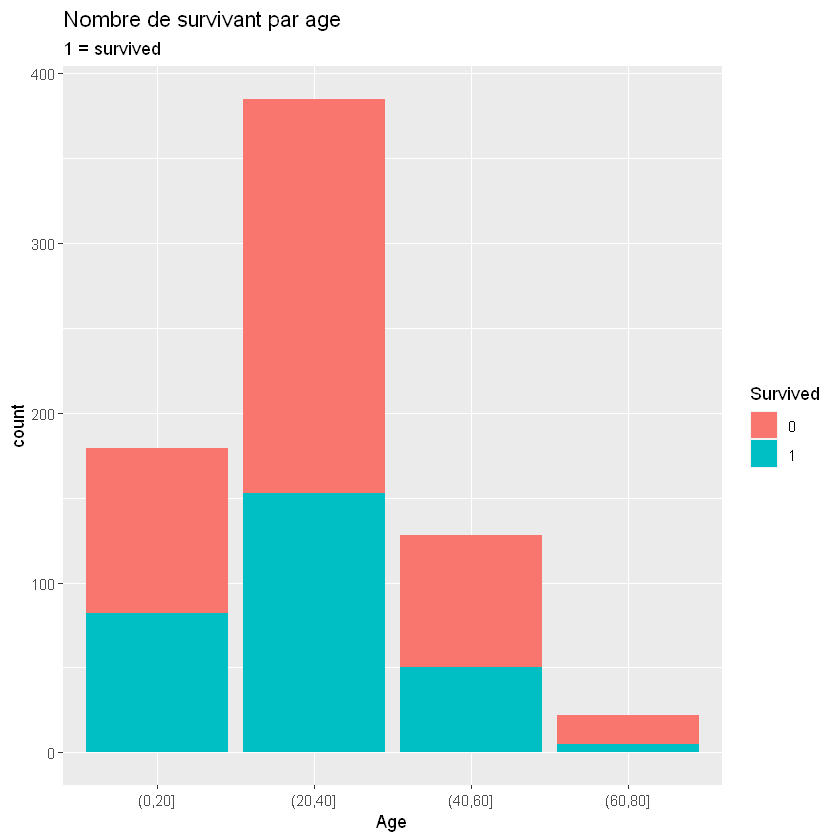

In [28]:
# Graphique : Survie par rapport à l'age des passagers
ggplot(data_no_na) + 
  geom_histogram(aes(x=cAge, fill=Survived), stat="count") +
  labs(title = "Nombre de survivant par age",
       subtitle = "1 = survived",
       x="Age")

In [29]:
# Proportion de survie par sexe
data %>% group_by(Sex) %>% summarise(survived = sum(Survived==1),
                                    not_survived = sum(Survived==0),
                                    tot = survived + not_survived,
                                    survived_rate = survived / tot)


Sex,survived,not_survived,tot,survived_rate
female,233,81,314,0.7420382
male,109,468,577,0.1889081


In [30]:
# Proportion de survie par classe
data %>% group_by(Pclass) %>% summarise(survived = sum(Survived==1),
                                       not_survived = sum(Survived==0),
                                       tot = survived + not_survived,
                                       survived_rate = survived / tot)

Pclass,survived,not_survived,tot,survived_rate
1,136,80,216,0.6296296
2,87,97,184,0.4728261
3,119,372,491,0.2423625


In [31]:
# Proportion de survie par age
data_no_na %>% group_by(cAge) %>% summarise(survived = sum(Survived==1),
                                       not_survived = sum(Survived==0),
                                       tot = survived + not_survived,
                                       survived_rate = survived / tot)

cAge,survived,not_survived,tot,survived_rate
"(0,20]",82,97,179,0.4581006
"(20,40]",153,232,385,0.3974026
"(40,60]",50,78,128,0.3906250
"(60,80]",5,17,22,0.2272727


In [32]:
# Calcul du coefficient de corrélation entre nos variables
mcor <- cor(data.matrix(data_no_na, rownames.force = NA))

In [33]:
# Création d'une palette de couleur dégradé rouge et bleu
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))


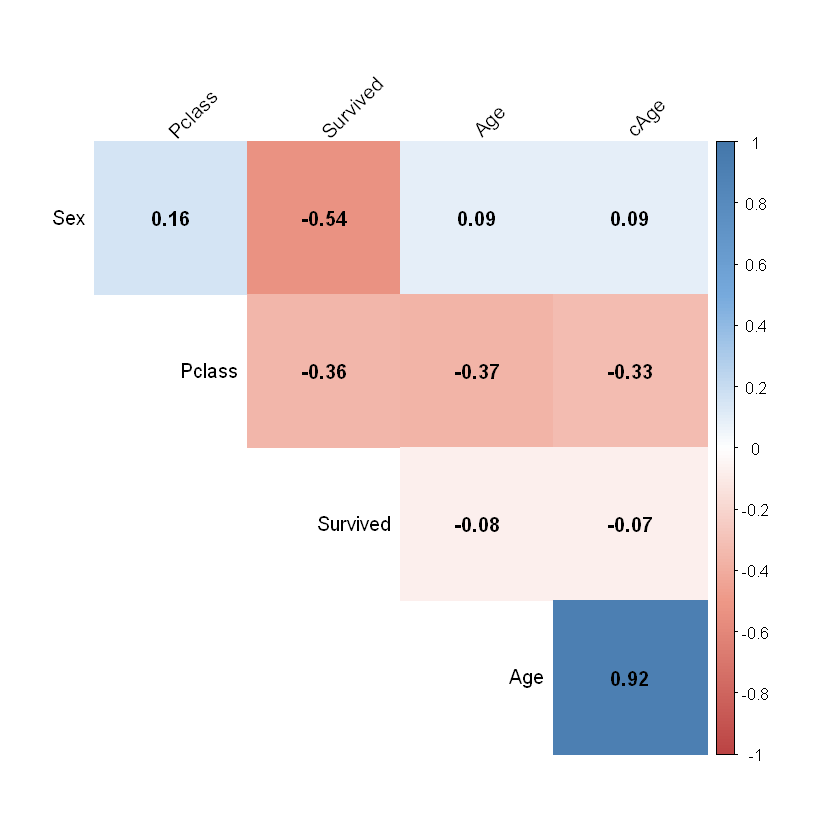

In [34]:
# Matrice de corrélation utilisant la matrice préalablement calculé mcor
corrplot(mcor, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Ajout du coefficient de corrélation
         tl.col="black", tl.srt=45, #Rotation des etiquettes de textes
         # Combiner avec le niveau de significativité
         sig.level = 0.01, insig = "blank", 
         # Cacher les coefficients de corrélation sur la diagonale
         diag=FALSE 
)

# Prédiction de survie pour les passagers du Titanic 

In [35]:
# Construction des tables de probabilitées de nos variables
S_P <- prop.table(table(data$Pclass, data$Survived), margin=2)
S_Sx <- prop.table(table(data$Sex, data$Survived))
S_Ca <- prop.table(table(data$cAge, data$Survived))
S <- prop.table(table(data$Survived))

In [43]:
prob_total <- function(Sex, Pclass, Age, S_Sx, S_P, S_Ca, s) {
  # Calcul la probabilité de survie (s=2) ou non (s=1) par rapport au profil du passager (sexe, age, classe)
  
  # On récupère les probas qui nous interressent pour utiliser la formule probabilités totales
  
  # S_Sx = table de probabilité de survie par sexe
  if (Sex == "female") {sex_prob <- S_Sx[1, s]}
  else if (Sex == 'male') {sex_prob <- S_Sx [2, s]}
  else {return ("warning, Sex variable is incorrect")}
  
  # S_Sx = table de probabilité de survie par classe
  if (Pclass == 1) {class_prob <- S_P[1, s]}
  else if (Pclass == 2) {class_prob <- S_P[2, s]}
  else if (Pclass == 3) {class_prob <- S_P[3, s]}
  else {return ("warning, Class variable is incorrect")
       }
     # Pour le test.csv on remplace Na par 0 sur l'âge
  # Une probabilité de 1 n'aura pas d'influence sur le calcul
  if (Age == 0) {age_prob <- 1}
  else if (Age <= 20) {age_prob <- S_Ca[1, s]}
  else if (Age <= 40) {age_prob <- S_Ca[2, s]} 
  else if (Age <= 60) {age_prob <- S_Ca[3, s]} 
  else if (Age <= 100) {age_prob <- S_Ca[4, s]} 
  else {return ("warning, Age variable is incorrect")}
  
  return (sex_prob * class_prob * age_prob)
    }
  

In [44]:

prob_prediction <- function(Sex, Pclass, Age, S_Sx, S_P, S_Ca, S) {
  # naive bayes classifier w/ Maximum a Posteriori Probability
  
  # donne la probabilité de survie d'un passager 
  # en fonction de son age, son sexe et la classe dans laquelle il voyageait
  
  # prend en arguments trois vecteur et les tables de probabilités nécéssaires
  # Sex: caracteres "female" ou "male"
  # Pclass: classe dans laquelle voyageait le passager; numeric
  # Age: numeric
  
  # retourne 1 si la probabilité de survie > 0.5 sinon 0
  
  survived <- prob_total(Sex, Pclass, Age, S_Sx, S_P, S_Ca, 1)
  not_survived <- prob_total(Sex, Pclass, Age, S_Sx, S_P, S_Ca, 2)
  
  if (survived / (survived + not_survived) > 0.5) {return (1)}
  else {return (0)}
}

In [45]:
# Une fois les probabilités calculés sur les données d'entrainement
# On va tenter de prédire si les passagers du fichier test vont survivre ou non

# N'ayant pas le jeu de données avec la survie, nous utiliserons celui de kaggle
# Ou nous pouroons uploader nos prédictions afin de déterminer les perfomances du modèle

test <- read.csv("test.csv")
test <- select(test, Sex, Age, Pclass, PassengerId)

# On remplace nos Na
test[is.na(test)] <- 0

# Création d'un df vide pour y mettre nos prédiction 
pred <- data.frame("PassengerId"=numeric(418),
                   "Survived"=numeric(418), 
                   stringsAsFactors = FALSE)
k <- 1

In [46]:
# On parcours notre dataset (de 419 lignes)
while (k < 419) {
  # On calcul nos prédiction pour chaque ligne
  c <- prob_prediction(Sex=test[k,1], 
                       Age=test[k,2], 
                       Pclass=test[k,3], 
                       S_Sx=S_Sx, 
                       S_P=S_P, 
                       S_Ca=S_Ca, 
                       S=S)
  # On met notre prédiction de survie dans un df
  pred[k, 2] <- c[1]
  # On met aussi l'ID du passager
  pred[k, 1] <- test[k, 4]
  k = k + 1
}

In [47]:
# On créée notre fichier pred.csv avec nos prédiction 
write.csv(pred,'pred.csv', row.names = FALSE)

#score: 0.76794